In [1]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model('./model/my_model_cnn_use/10-0.0266.hdf5')

model.summary() #앞에 학습시켰던 모든 정보를 확인할 수 있습니다.
#파리미터(Param #)가 0인 경우는 이미지 축소 과정을 하느라 그런거임..

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [2]:

n=5
test_num = [[0]*n for _ in range(n)]

#plt.imread든  cv2.imread든 이미지를 읽어오는 점은 똑같다.

#test_num[0] = plt.imread('./model/minist_test/2.jpg') 
#test_num[1] = plt.imread('./model/minist_test/3.jpg')
#test_num[2] = plt.imread('./model/minist_test/5.jpg')
#test_num[3] = plt.imread('./model/minist_test/6.jpg')
#test_num[4] = plt.imread('./model/minist_test/7.jpg')


#test_num[0] = cv2.imread('./model/minist_test/2.jpg') 
#test_num[1] = cv2.imread('./model/minist_test/3.jpg')
#test_num[2] = cv2.imread('./model/minist_test/5.jpg')
#test_num[3] = cv2.imread('./model/minist_test/6.jpg')
#test_num[4] = cv2.imread('./model/minist_test/7.jpg')


test_num[0] = cv2.imread('./model/minist_test/2_white.png') 
test_num[1] = cv2.imread('./model/minist_test/3_white.png')
test_num[2] = cv2.imread('./model/minist_test/5_white.png')
test_num[3] = cv2.imread('./model/minist_test/6_white_re.png')
test_num[4] = cv2.imread('./model/minist_test/7_white.png')




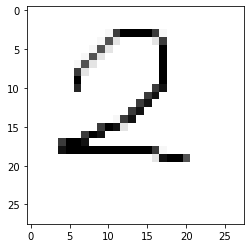

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Answer 0 is [2]


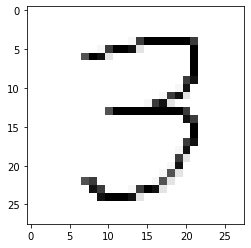

The Answer 1 is [3]


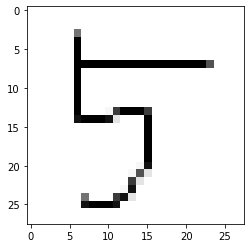

The Answer 2 is [5]


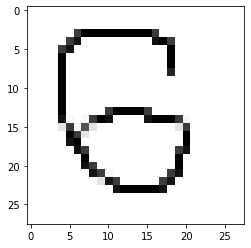

The Answer 3 is [3]


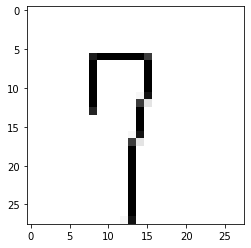

The Answer 4 is [7]


In [3]:
for i in range(5):
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY) 
    #cv2.cvtColor : 색상을 흑백으로 바꿔준다. 이를 않을 경우 변형된(반전된) 컬러가 찍히단.
    #따라서 cv2.cvtColor와  cv2.COLOR_BGR2GRAY를 통해 반전해주어서 하얀바탕에 검정글씨로 찍히도록 한다.
    test_num[i] = cv2.bitwise_not(test_num[i])
    plt.imshow(test_num[i], cmap='Greys');
    plt.show()
    test_num[i] = test_num[i].reshape(1,28,28,1).astype('float64') / 255
    print('The Answer',i,'is',model.predict_classes(test_num[i]))